# Redes Neurais Artificiais – Atividade Avaliativa 2.1

### Aprendizado Supervisionado no Neurônio Perceptron

#### 2.1. Parte I – Resolvendo um Problema Linearmente Separável

In [28]:
# import os
# from os.path import expanduser

# os.chdir(expanduser("~"))

In [29]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

Função de ativação Degrau com limiar = 0 / Taxa de aprendizado = 0.1 / Pesos = [-0.5:0.5] 

Executar o algoritmo até a convergencia

In [30]:
def conv_inp_out(arquivo):
  N = 3
  data_np = np.fromfile('data/'+arquivo)
  data = np.ndarray((int(len(data_np)/N),N), buffer=data_np)
  X = data[:,:N-1]
  yd = data[:,N-1]
  return (X, yd, data)


In [31]:
X, yd, data = conv_inp_out('dataAll.txt')

In [32]:
data.shape

(1000, 3)

In [33]:
data

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [34]:
X[:5]

array([[-363.7884,  244.1423],
       [ 328.7572, -256.7658],
       [-164.9827,  613.2164],
       [ 536.5905,  764.9575],
       [ 314.2297,  343.8375]])

In [35]:
yd[:5]

array([0., 1., 0., 0., 0.])

In [36]:
#! curl -o dataAll.txt "https://docs.google.com/uc?export=download&id=1HrlvFXy4xJhaS2KfAt3CI7HRBjl6g1dk"
#! wget "https://docs.google.com/uc?export=download&id=1HrlvFXy4xJhaS2KfAt3CI7HRBjl6g1dk"

In [37]:
def degrau_gen(theta = 0):
  def f(u):
    return np.where(u >= theta, 1, 0)
  return f

In [38]:
# exemplo de funcionamento
limiar = 0
degrau = degrau_gen(limiar)
print(degrau(-7), degrau(3))

0 1


In [70]:
class Perceptron(object):
    """Perceptron de Rosenblatt
    """
    def __init__(self, ativacao = degrau_gen(), apz=0.1, ini_intervalo = -0.5, fim_intervalo = 0.5):
        self.ativacao = ativacao
        self.apz = apz
        self.ini_intervalo = ini_intervalo
        self.fim_intervalo = fim_intervalo
        self.x0 = -1

    def fit(self, X, yd, n_iteracoes = None, print_ajuste = False):
        entradas = np.insert(X, 0, self.x0, axis=1)

        self.w_ = np.random.uniform(self.ini_intervalo, self.fim_intervalo, entradas.shape[1])
        print('Pesos iniciais:', self.w_)
        epcs = 0
        ajustes = 0

        while True:
            ajustes_peso_epoca = 0

            for xi, target in zip(entradas, yd):
                y = self.predict(xi)
                erro_ = target - y

                if erro_ != 0:
                    delta = self.apz * erro_ * xi
                    self.w_ += delta

                    ajustes_peso_epoca += 1
                    if print_ajuste:
                      print("Pesos ajustados:", self.w_)
            epcs+=1
            print(f"Ajustes em época {epcs}: {ajustes_peso_epoca}")
            if (ajustes_peso_epoca == 0 if n_iteracoes is None else epcs == n_iteracoes):
                break
            else:
                ajustes += ajustes_peso_epoca

        print("O número total de ajustes no vetor de pesos:", ajustes)
        print("O número de épocas até a convergência:", epcs)
        self.epocas = epcs
        self.ajustes = ajustes
        return self

    def u(self, X):
        """Cálculo da entrada da rede antes da ativação"""
        return np.dot(X, self.w_)

    def predict(self, X):
        return self.ativacao(self.u(X))

In [44]:
rede = Perceptron()

In [45]:
rede_ajustada = rede.fit(X, yd, print_ajuste=True)

Pesos iniciais: [ 0.37081439  0.4746097  -0.2293173 ]
Pesos ajustados: [  0.47081439 -53.1844403  -76.7250673 ]
Pesos ajustados: [  0.37081439  19.6115797  -40.8955073 ]
Pesos ajustados: [  0.27081439 102.2102797   38.9603227 ]
Pesos ajustados: [  0.37081439 108.0560397  -39.3342673 ]
Pesos ajustados: [   0.47081439   68.0471297  -117.2269573 ]
Pesos ajustados: [  0.57081439 126.4900497  -75.6466773 ]
Pesos ajustados: [   0.47081439   73.5299897  -132.5161373 ]
Pesos ajustados: [  0.57081439 133.0895097  -82.3938073 ]
Pesos ajustados: [   0.47081439   87.5648797  -148.0297373 ]
Pesos ajustados: [   0.57081439  101.9033097  -138.6435173 ]
Pesos ajustados: [  0.67081439 192.6191697  -63.9301973 ]
Pesos ajustados: [   0.57081439  134.8381797  -124.2383473 ]
Pesos ajustados: [   0.47081439   84.9283597  -175.4987773 ]
Pesos ajustados: [   0.37081439  112.7520897  -157.4438573 ]
Pesos ajustados: [   0.27081439  140.2156797  -136.5875073 ]
Pesos ajustados: [ 1.70814389e-01  7.13599997e+01 -2

[Calculate the Decision Boundary of a Single Perceptron - Visualizing Linear Separability](https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38)

* Ax + By - C = 0

* w1x + w2y + b

* w1 * x1 + w2 * x2 + b

* x-intercept: 
x = -(b - w2y) / w1

if y == 0

x = -(b - w2 * 0) / w1

x = -b / w1

* y-intercept: 
y = -(b - w1x) / w2

if x == 0

y = -(b - w1 * 0) / w2

y = -b / w2

* point_1 = (0, -b / w2) 

* point_2 = (-b / w1, 0)

* m = (y2 - y1) / (x2 - x1)

m = (0 - -(b / w2)) / (-(b / w1) - 0)

* m = -(b / w2) / (b / w1)

* y = m.x + y0

y = (-(b / w2) / (b / w1))x + (-b / w2)

b = w0 * x0 = -w0

**y = (-w1/w2)x + w0/w2**


In [46]:
x_reta = np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1]))
x_reta

array([-999.9963    , -959.2445898 , -918.49287959, -877.74116939,
       -836.98945918, -796.23774898, -755.48603878, -714.73432857,
       -673.98261837, -633.23090816, -592.47919796, -551.72748776,
       -510.97577755, -470.22406735, -429.47235714, -388.72064694,
       -347.96893673, -307.21722653, -266.46551633, -225.71380612,
       -184.96209592, -144.21038571, -103.45867551,  -62.70696531,
        -21.9552551 ,   18.7964551 ,   59.54816531,  100.29987551,
        141.05158571,  181.80329592,  222.55500612,  263.30671633,
        304.05842653,  344.81013673,  385.56184694,  426.31355714,
        467.06526735,  507.81697755,  548.56868776,  589.32039796,
        630.07210816,  670.82381837,  711.57552857,  752.32723878,
        793.07894898,  833.83065918,  874.58236939,  915.33407959,
        956.0857898 ,  996.8375    ])

In [47]:
w0, w1, w2 = rede_ajustada.w_

In [48]:
print(w0, w1, w2)

0.2708143889685294 312.8783597045898 -311.87941729556496


In [49]:
y_reta = -w1/w2 * x_reta + w0/w2
y_reta

array([-1003.20013287,  -962.3178959 ,  -921.43565893,  -880.55342196,
        -839.67118499,  -798.78894802,  -757.90671105,  -717.02447408,
        -676.14223711,  -635.26000014,  -594.37776317,  -553.4955262 ,
        -512.61328923,  -471.73105226,  -430.84881529,  -389.96657832,
        -349.08434135,  -308.20210438,  -267.31986741,  -226.43763044,
        -185.55539347,  -144.6731565 ,  -103.79091954,   -62.90868257,
         -22.0264456 ,    18.85579137,    59.73802834,   100.62026531,
         141.50250228,   182.38473925,   223.26697622,   264.14921319,
         305.03145016,   345.91368713,   386.7959241 ,   427.67816107,
         468.56039804,   509.44263501,   550.32487198,   591.20710895,
         632.08934592,   672.97158289,   713.85381986,   754.73605683,
         795.6182938 ,   836.50053076,   877.38276773,   918.2650047 ,
         959.14724167,  1000.02947864])

In [50]:
data_plot = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])

In [51]:
classe_0 = data_plot.loc[data_plot['y'] == 0]
classe_1 = data_plot.loc[data_plot['y'] == 1]

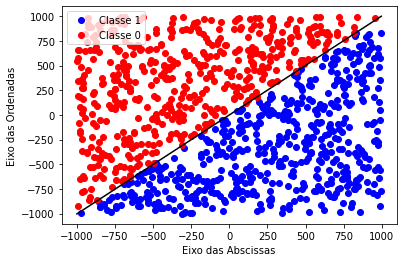

In [52]:
plt.plot(classe_1.x1, classe_1.x2, 'bo', label='Classe 1')
plt.plot(classe_0.x1, classe_0.x2, 'ro', label='Classe 0')

plt.plot(x_reta, y_reta, 'black')

plt.xlabel('Eixo das Abscissas')
plt.ylabel('Eixo das Ordenadas')
plt.legend(loc='upper left')
plt.show()

#### 2.2. Parte II – Experimentação

In [53]:
X, yd, _ = conv_inp_out('data0.txt')

In [54]:
apzs = [0.4, 0.1, 0.01]
lmt = [(-100,100), (-0.5,0.5)]
n = 10

In [55]:
data_list = list()
for ini, fim in lmt:
  for apz in apzs:
    rede = Perceptron(apz=apz, ini_intervalo=ini, fim_intervalo=fim)
    for i in range(1,n+1):
      rede_ajustada = rede.fit(X, yd)
      data_list.append((apz, str(ini)+','+str(fim), rede_ajustada.ajustes, rede_ajustada.epocas))

A saída de streaming foi truncada nas últimas 5000 linhas.
Ajustes em época 79: 1
Ajustes em época 80: 2
Ajustes em época 81: 1
Ajustes em época 82: 1
Ajustes em época 83: 2
Ajustes em época 84: 1
Ajustes em época 85: 1
Ajustes em época 86: 1
Ajustes em época 87: 2
Ajustes em época 88: 1
Ajustes em época 89: 1
Ajustes em época 90: 2
Ajustes em época 91: 1
Ajustes em época 92: 1
Ajustes em época 93: 2
Ajustes em época 94: 1
Ajustes em época 95: 1
Ajustes em época 96: 2
Ajustes em época 97: 1
Ajustes em época 98: 1
Ajustes em época 99: 2
Ajustes em época 100: 1
Ajustes em época 101: 1
Ajustes em época 102: 0
O número total de ajustes no vetor de pesos: 513
O número de épocas até a convergência: 102
Pesos iniciais: [ 71.29686307 -95.64043742  19.65652693]
Ajustes em época 1: 300
Ajustes em época 2: 174
Ajustes em época 3: 102
Ajustes em época 4: 35
Ajustes em época 5: 27
Ajustes em época 6: 23
Ajustes em época 7: 21
Ajustes em época 8: 19
Ajustes em época 9: 17
Ajustes em época 10: 17
Aju

In [56]:
data = pd.DataFrame(data_list, columns=['apz','intervalo','ajustes','epocas'])

In [57]:
gb = data.groupby(['apz','intervalo'])
resumo = gb.agg(['mean','std','min']).drop([('ajustes', 'min'), ('epocas', 'mean'), ('epocas', 'std')], axis = 1)
resumo

ajustes              epocas
                   mean          std    min
apz  intervalo                             
0.01 -0.5,0.5      38.9    32.490853      2
     -100,100   12896.5  7662.395539     60
0.10 -0.5,0.5      10.0     5.557777      3
     -100,100     890.2   313.105875     11
0.40 -0.5,0.5       8.3     3.560587      3
     -100,100     354.5   256.875348      5

#### 2.3. Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [58]:
X, yd, data = conv_inp_out('dataHoldout.txt')

In [59]:
data

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

In [60]:
data_plot = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])

In [61]:
classe_0 = data_plot.loc[data_plot['y'] == 0]
classe_1 = data_plot.loc[data_plot['y'] == 1]

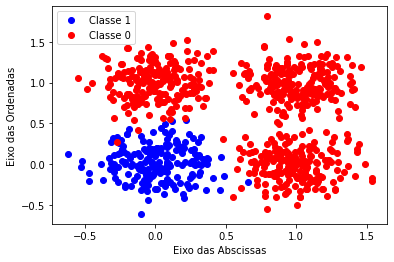

In [62]:
plt.plot(classe_1.x1, classe_1.x2, 'bo', label='Classe 1')
plt.plot(classe_0.x1, classe_0.x2, 'ro', label='Classe 0')

plt.xlabel('Eixo das Abscissas')
plt.ylabel('Eixo das Ordenadas')
plt.legend(loc='upper left')
plt.show()

In [63]:
np.random.shuffle(data)

In [64]:
train, test = np.split(data, [int(.7 * len(data))])

In [65]:
print(f'{len(train)} - treinamento; {len(test)} - teste')

560 - treinamento; 240 - teste


In [67]:
N = 3
X_train = train[:,:N-1]
yd_train = train[:,N-1]

In [71]:
rede = Perceptron()

In [72]:
rede_ajustada = rede.fit(X_train, yd_train, n_iteracoes=100)

Pesos iniciais: [ 0.06064443 -0.40494771 -0.18554636]
Ajustes em época 1: 36
Ajustes em época 2: 32
Ajustes em época 3: 26
Ajustes em época 4: 24
Ajustes em época 5: 24
Ajustes em época 6: 23
Ajustes em época 7: 22
Ajustes em época 8: 28
Ajustes em época 9: 26
Ajustes em época 10: 24
Ajustes em época 11: 30
Ajustes em época 12: 28
Ajustes em época 13: 26
Ajustes em época 14: 26
Ajustes em época 15: 26
Ajustes em época 16: 30
Ajustes em época 17: 28
Ajustes em época 18: 26
Ajustes em época 19: 26
Ajustes em época 20: 30
Ajustes em época 21: 28
Ajustes em época 22: 26
Ajustes em época 23: 26
Ajustes em época 24: 28
Ajustes em época 25: 26
Ajustes em época 26: 28
Ajustes em época 27: 28
Ajustes em época 28: 28
Ajustes em época 29: 28
Ajustes em época 30: 26
Ajustes em época 31: 28
Ajustes em época 32: 26
Ajustes em época 33: 26
Ajustes em época 34: 30
Ajustes em época 35: 26
Ajustes em época 36: 28
Ajustes em época 37: 26
Ajustes em época 38: 26
Ajustes em época 39: 26
Ajustes em época 40

In [79]:
def get_confusion_matrix(data, preditor):
    true_class = 1

    # predicoes corretas
    tp = 0
    tn = 0
    
    # predicoes incorretas
    fp = 0
    fn = 0
    
    for [x1, x2, yd] in (data):
        v_predito = preditor.predict([-1, x1, x2])

        if yd == true_class:
          if v_predito == yd:
            tp += 1
          else:
            fp += 1
        else:
          if v_predito == yd:
            tn += 1
          else:
            fn += 1
    
    return np.array([
                     # valores da classe positiva
                     [ tp, fp ],
                     # valores da classe negativa
                     [ fn, tn ]
                     ])

confusion_matrix = get_confusion_matrix(test, rede_ajustada)

Matriz de Confusão - Testes

In [80]:
pd.DataFrame(confusion_matrix, columns=['Predito 1', 'Predito 0'], index=['Real 1', 'Real 0'])

,Predito 1,Predito 0
Real 1,60,8
Real 0,4,168


Métricas - Treinamento

In [83]:
[[ tp, fp ],[ fn, tn ]] = get_confusion_matrix(train, rede_ajustada)

Acurácia

In [84]:
accurary = (tp+tn)/(tp+fp+tn+fn)
accurary

0.9642857142857143

Recall

In [85]:
recall = tp/(tp+fn)
recall

0.9590163934426229

Precisão

In [86]:
precision = tp/(tp+fp)
precision

0.8863636363636364

F-score

In [87]:
f_score = 2*(precision*recall)/(precision+recall)
f_score

0.921259842519685